## Análise estatística

## Questão 1

Com base no arquivo `bp.csv`, avalie:
- Teste t
- Wilcoxon rank sum

E reporte:
1. O p-valor da comparação entre a pressão sanguínea de pessoas diabéticas ou não
2. Qual tem a maior pressão média? E maior pressão mediana?
3. A diferença é significativa?

Discuta a diferença dos p-valores. Quais dos 2 testes você acha mais aproriado nesse caso?

### Carregando os dados

In [1]:
import pandas as pd

bp = pd.read_csv('./data/bp.csv')
bp

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


### Dividindo as populações

Tendo os dados que foram coletados, iremos agora dividí-los em duas populações. Considero que `type=yes` significa que a pessoa possui diabetes

In [2]:
pop_diabetes = bp.loc[bp['type'] == 'Yes']['bp']
pop_no_diabetes = bp.loc[bp['type'] == 'No']['bp']

In [3]:
pop_diabetes

1       70
5       76
9       78
10      40
12      60
      ... 
187     62
189    102
192     48
196     68
199     62
Name: bp, Length: 68, dtype: int64

In [4]:
pop_no_diabetes

0      68
2      82
3      76
4      60
6      58
       ..
193    68
194    74
195    58
197    70
198    58
Name: bp, Length: 132, dtype: int64

### Executando os testes

#### Teste T

Considerando os dados, irei agora executar o Teste T nas duas populações:

In [5]:
import scipy.stats as stats

stats.ttest_ind(pop_diabetes, pop_no_diabetes)

Ttest_indResult(statistic=3.001495202122035, pvalue=0.0030323591864622732)

#### Wilcoxon Rank Sums

In [6]:
stats.ranksums(pop_diabetes,pop_no_diabetes)

RanksumsResult(statistic=3.045797809294312, pvalue=0.0023206383267846886)

### Comparando os p-valores

Como é possível ver nos dois testes reportados acima, vejos que considerando o Teste T, $p-value = 0.003$, enquanto para o teste Wilcoxon Rank Sums (não-paramétrico) $p-value = 0.002$. Ambos são bem próximos.

### Avaliando médias e medianas

In [7]:
avg_diabetes = pop_diabetes.mean()
avg_no_diabetes = pop_no_diabetes.mean()

print(f'Média diabetes: {avg_diabetes}')
print(f'Média sem diabetes: {avg_no_diabetes}')

Média diabetes: 74.58823529411765
Média sem diabetes: 69.54545454545455


In [8]:
median_diabetes = pop_diabetes.median()
median_no_diabetes = pop_no_diabetes.median()

print(f'Mediana diabetes: {median_diabetes}')
print(f'Mediana sem diabetes: {median_no_diabetes}')

Mediana diabetes: 76.0
Mediana sem diabetes: 70.0


### Conclusão

Com base nessa análise, vemos que há sim uma diferência de pressão sanguínea entre as duas populações. Vemos também que, com base no p-valor que encontramos, os dados **são estatísticamente significantes** e podemos considerar que eles representam distribuições diferentes. Por fim, temos uma redução considerável tanto na média quanto na mediana, podendo assim afirmar que de fato **pacientes sem diabetes tem uma pressão sanguínea inferior**.

Considerando os dois possíveis testes, como não temos a informação em relação as distribuições, acredito que o mais adequado seria utilizarmos o **Wilcoxon Rank Sums**, pois ele não assume uma distribuição.

## Questão 2

Com base no arquivo `paired.csv`, avalie:
- Teste t pareado
- Wilcoxon signed rank

E reporte:
1. Qual o mês com maior média e maior mediana?
2. A diferença é significativa?
3. Discuta a diferença dos p-valores, quais dos 2 testes você acha mais apropriado?

### Carregando os dados

In [9]:
import pandas as pd

paired = pd.read_csv('./data/paired.csv')
paired

,Clone,August,November
0,Balsam_Spire,8.1,11.2
1,Beaupre,10.0,16.3
2,Hazendans,16.5,15.3
3,Hoogvorst,13.6,15.6
4,Raspalje,9.5,10.5
5,Unal,8.3,15.5
6,Columbia_River,18.3,12.7
7,Fritzi_Pauley,13.3,11.1
8,Trichobel,7.9,19.9
9,Gaver,8.1,20.4


### Dividindo as populações

Como população, considero as colunas dos meses, sendo `August` antes da intervenção e `November` após

In [10]:
pre = paired['August']
post = paired['November']

In [11]:
pre

0      8.1
1     10.0
2     16.5
3     13.6
4      9.5
5      8.3
6     18.3
7     13.3
8      7.9
9      8.1
10     8.9
11    12.6
12    13.4
Name: August, dtype: float64

In [12]:
post

0     11.2
1     16.3
2     15.3
3     15.6
4     10.5
5     15.5
6     12.7
7     11.1
8     19.9
9     20.4
10    14.2
11    12.7
12    36.8
Name: November, dtype: float64

### Executando os testes

#### Teste T Pareado

In [13]:
import scipy.stats as stats

stats.ttest_rel(pre, post)

Ttest_relResult(statistic=-2.3088956550760438, pvalue=0.03955525086687241)

#### Wilcoxon Signed Rank

In [14]:
stats.wilcoxon(pre, post)

WilcoxonResult(statistic=16.0, pvalue=0.039794921875)

### Avaliando as médias e medianas

In [15]:
avg_august = pre.mean()
avg_november = post.mean()

print(f'Média Agosto: {avg_august}')
print(f'Média Novembro: {avg_november}')

Média Agosto: 11.423076923076925
Média Novembro: 16.323076923076922


In [16]:
median_august = pre.median()
median_november = post.median()

print(f'Mediana Agosto: {median_august}')
print(f'Mediana Novembro: {median_november}')

Mediana Agosto: 10.0
Mediana Novembro: 15.3


### Conclusão

Com base nessa análise, vemos que há uma diferença quando olhamos aos dados de forma pareada. Vemos também que, com base no p-valor que encontramos, os dados **são estatísticamente significantes** e podemos considerar que eles representam distribuições diferentes. Por fim, temos um aumento considerável tanto na média quanto na mediana, podendo assim afirmar que de fato **há intervenção teve algum resultado**.

Considerando os dois possíveis testes, como não temos a informação em relação as distribuições, acredito que o mais adequado seria utilizarmos o **Wilcoxon Signed Rank**, pois ele não depende do tipo da distribuição dos dados.

## Questão 3

Utilizando os dados não pareados localizados em `bp.csv` gere o intervalo de confiança para a pressão sanguínea dos pacientes com e sem diabetes (intervalo de 95% de confiança) usando o método de bootstrap

### Carregando os dados

In [17]:
import pandas as pd

bp = pd.read_csv('./data/bp.csv')
bp

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


### Dividindo as populações

Tendo os dados que foram coletados, iremos agora dividí-los em duas populações. Considero que `type=yes` significa que a pessoa possui diabetes

In [18]:
pop_diabetes = bp.loc[bp['type'] == 'Yes']['bp']
pop_no_diabetes = bp.loc[bp['type'] == 'No']['bp']

In [19]:
pop_diabetes

1       70
5       76
9       78
10      40
12      60
      ... 
187     62
189    102
192     48
196     68
199     62
Name: bp, Length: 68, dtype: int64

In [20]:
pop_no_diabetes

0      68
2      82
3      76
4      60
6      58
       ..
193    68
194    74
195    58
197    70
198    58
Name: bp, Length: 132, dtype: int64

### Calculando o intervalo de confiança

#### Para a população com diabetes

In [21]:
import scipy.stats as stats
import numpy as np

stats.bootstrap((pop_diabetes,), np.mean, confidence_level=0.95,
                random_state=1, method='BCa')

BootstrapResult(confidence_interval=ConfidenceInterval(low=71.77941176470588, high=77.29411764705883), standard_error=1.3984577204066557)

#### Para a população sem diabetes

In [22]:
stats.bootstrap((pop_no_diabetes,), np.mean, confidence_level=0.95,
                random_state=1, method='BCa')

BootstrapResult(confidence_interval=ConfidenceInterval(low=67.6590909090909, high=71.47727272727273), standard_error=0.9743534828940902)

### Conclusão

Com base no que foi calculado acima, e considerando um p-value de 0.05 (com nível de confiança em 95%), podemos afirmar pra esse intervalo de confiança pessoas sem diabetes possuem sim um batimento cardíaco reduzido. Vemos isso claramente ao avaliar o teste de bootstrap, onde **para pessoas sem diabetes** temos o menor valor sendo $67.6$ e o maior sendo $71.4$ (com desvio padrão de $0.97$), enquanto **para pessoas com diabetes** temos o menor valor sendo $71.77$ e o maior $77.29$ (com desvio padrão de $1.39$)

## Questão 4

Utilizando os dados calculados na questão 3 efetue um teste visual: há intersecção entre os intervalos de confiança dos 2 conjuntos de dados? Isso está de acordo com o teste de diferença significativa entre eles feito na questão 1?

Como os testes já foram executados nas questões anteriores, não há necessidade de repetílos, portato irei direto para a resposta

### Resposta

Considerando os dois conjuntos de dados da questão anterior, vemos que não há intersecção entre os intervalos de confiança. Podemos ver isso através do seguinte gráfico:

In [23]:
no_diabetes_ci = stats.bootstrap((pop_no_diabetes,), np.mean, confidence_level=0.95, random_state=1, method='BCa')
diabetes_ci = stats.bootstrap((pop_diabetes,), np.mean, confidence_level=0.95, random_state=1, method='BCa')

no_diabetes_low = no_diabetes_ci.confidence_interval.low
no_diabetes_high = no_diabetes_ci.confidence_interval.high

diabetes_low = diabetes_ci.confidence_interval.low
diabetes_high = diabetes_ci.confidence_interval.high

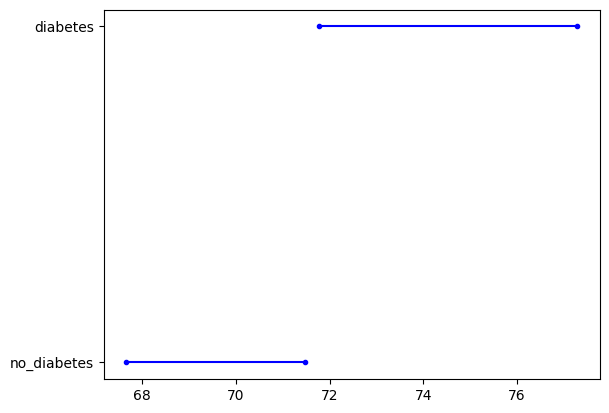

In [32]:
from matplotlib import pyplot as plt

cat = ['no_diabetes', 'diabetes']
low = [no_diabetes_low, diabetes_low]
high = [no_diabetes_high, diabetes_high]

for high, low, y in zip(high, low, cat):
  plt.plot((low, high), (y, y), 'b.-')

Como podemos ver no gráfico acima, não há intersecção entre ambas. No gráfico em si pelos valores de alta da população sem diabetes ser bem próximo do valor de baixa do com diabetes fica um pouco difícil de visualizar, mas ao olhar pro valor sem si vemos que não há intersecção. Isso comprova o que já foi dito anteriormente na questão um, que podemos considerar esse resultado como estatísticamente relevante e que de fato há sim uma diferença

## Questão 5

Calcule o Cohen D com o pooled standard deviation para a diferença entre a pressão sangüínea de pacientes com e sem diabetes

### Carregando os dados

In [34]:
import pandas as pd

bp = pd.read_csv('./data/bp.csv')
bp

,bp,type
0,68,No
1,70,Yes
2,82,No
3,76,No
4,60,No
...,...,...
195,58,No
196,68,Yes
197,70,No
198,58,No


### Definindo a função pro cálculo

In [35]:
from math import sqrt
import numpy as np
 
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = np.mean(d1), np.mean(d2)
    return (u1 - u2) / s

### Calculando o Cohen D

In [36]:
pop_diabetes = bp.loc[bp['type'] == 'Yes']['bp']
pop_no_diabetes = bp.loc[bp['type'] == 'No']['bp']

d = cohend(pop_diabetes, pop_no_diabetes)
print('Cohens d: %.3f' % d)

Cohens d: 0.448


## Questão 6

Com base nos testes, intervalos de confiança, etc realizados acima sobre o dataset bp.csv, qual a sua conclusão sobre pressão arterial em pacientes com ou sem diabetes?

### Resposta

Com base nos testes que foram executados fica evidente que a pressão arterial de pacientes sem diabetes é, em média, inferior. Justifico isso pois há uma evidente diferença entre as duas populações considerando um $p-value$ de 0.05. Avaliei, também, o intevalor de confiança e podemos ver que não intersecção entre ambos, deste modo podemos afirmar que existe base estatística para afirmarmos que pessoas sem diabetes possue uma pressão sanguinea inferior.